In [70]:
import pandas as pd 
import requests 
from xmljson import badgerfish as bf
from xml.etree.ElementTree import fromstring
import json
from json import loads
from pandas.io.json import json_normalize

from csv import reader

%matplotlib inline

In [71]:
# Import the MLS data CSV to Pandas DataFrames
from pathlib import Path
file_path = Path('Resources/mls77007_csv.csv')
mls77007_df = pd.read_csv(file_path, header=1, index_col='MLS Number')
mls77007_df.head()

,Property Type,Status,Street Number,Street Name,Unit Number,City/Location,Zip Code,County,List Price,Close Price,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
MLS Number,,,,,,,,,,,,,,,,,,,,,
57762389,Rental,Active,4223 1/2,Marina,NaN,Houston,77007,Harris,$895.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79734246,Rental,Active,1111,Durham Dr,220,Houston,77007,Harris,$1076.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35573780,Rental,Active,5353,Memorial,3026,Houston,77007,Harris,$1360.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12224183,Rental,Active,5353,Memorial,3017,Houston,77007,Harris,$1360.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3848481,Rental,Active,5353,Memorial,3002,Houston,77007,Harris,$1360.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# Slice the data for homes that are both active and for sale only
mls77007_forsale_df = mls77007_df[mls77007_df['Property Type'] != 'Rental']
mls77007_forsale_and_active_df = mls77007_forsale_df[mls77007_forsale_df['Status'] == 'Active']
mls77007_forsale_and_active_df.tail()

,Property Type,Status,Street Number,Street Name,Unit Number,City/Location,Zip Code,County,List Price,Close Price,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
MLS Number,,,,,,,,,,,,,,,,,,,,,
46894181,Single-Family,Active,408,7th,NaN,Houston,77007,Harris,$2490000.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46753820,Single-Family,Active,6026,Glencove,NaN,Houston,77007,Harris,$2499000.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50247574,Mid/Hi-Rise Condo,Active,6017,Memorial,206,Houston,77007,Harris,$2778050.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60666423,Single-Family,Active,422,Cowan,NaN,Houston,77007,Harris,$3795000.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52379549,Mid/Hi-Rise Condo,Active,6017,Memorial,702,Houston,77007,Harris,$5164625.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
### We attempted to create a loop that would take the address, feed into Zillow, then get more data for us to use via their
# create for loop that iterates through mls77007_forsale_and_active_df
# from json import dumps
# import requests
# import xml.etree.ElementTree as ET


# for index, row in mls77007_forsale_and_active_df.tail(5).iterrows():
#     #access data using column names
#     print(index, row['Street Number'], row['Street Name'], row['City/Location'], 
#           row['Zip Code'])
    
#     url = f"http://www.zillow.com/webservice/GetDeepSearchResults.htm?zws-id=X1-ZWz1hchwlx97uz_1mzvh&address={row['Street Number']}+{row['Street Name']}&citystatezip={row['Zip Code']}"
#     print(url)
#     response= requests.get(url)
#     print(response)
#     xml_data = response.text
#     json_data = dumps(bf.data(fromstring(xml_data)))
#     print(json_data)


In [115]:
file_path = Path('Resources/mls77007_caprates_csv.csv')
mls77007_caprates_df = pd.read_csv(file_path, header=0, index_col='MLS Number')
mls77007_caprates_df.head()

,Property Type,Status,Street Number,Street Name,Unit Number,City/Location,Zip Code,County,List Price,Close Price,...,List Agent MLSID,List Agent Full Name,Selling Office MLSID,Selling Office Name,Selling Agent MLSID,Selling Agent Full Name,Realist Owner Name,Last Change Timestamp,List Date,Cap_Rate
MLS Number,,,,,,,,,,,,,,,,,,,,,
57762389,Rental,Active,4223 1/2,Marina,NaN,Houston,77007,Harris,$895.00,NaN,...,XIULING,Shirley Ling Lu,NaN,NaN,NaN,NaN,NaN,09/14/2019 11:44:37 PM,09/14/2019 12:00:00 AM,NaN
79734246,Rental,Active,1111,Durham Dr,220,Houston,77007,Harris,$1076.00,NaN,...,mbmims,Marvin Mims,NaN,NaN,NaN,NaN,NaN,09/11/2019 7:11:34 PM,07/16/2019 12:00:00 AM,NaN
35573780,Rental,Active,5353,Memorial,3026,Houston,77007,Harris,$1360.00,NaN,...,dagsmith,Danielle Smith,NaN,NaN,NaN,NaN,NaN,09/06/2019 4:19:03 PM,09/06/2019 12:00:00 AM,NaN
12224183,Rental,Active,5353,Memorial,3017,Houston,77007,Harris,$1360.00,NaN,...,dagsmith,Danielle Smith,NaN,NaN,NaN,NaN,NaN,09/06/2019 4:12:28 PM,09/06/2019 12:00:00 AM,NaN
3848481,Rental,Active,5353,Memorial,3002,Houston,77007,Harris,$1360.00,NaN,...,dagsmith,Danielle Smith,NaN,NaN,NaN,NaN,NaN,09/06/2019 4:00:52 PM,09/06/2019 12:00:00 AM,NaN


In [122]:
#Cleaning the data so that we have only active and for sale items going out to the API tool
#This includes dropping the '$' from list price, for use in the mapbox plot later

mls77007_caprates_forsale_df = mls77007_caprates_df[mls77007_caprates_df['Property Type'] != 'Rental']
mls77007_caprates_active_forsale_df = mls77007_caprates_forsale_df[mls77007_caprates_forsale_df['Status'] == 'Active']
mls77007_caprates_active_forsale_df['List Price'] = mls77007_caprates_active_forsale_df['List Price'].astype(str).str.extract('(\d+)').astype(float)
mls77007_caprates_active_forsale_df.tail()


C:\Users\marcl\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Property Type,Status,Street Number,Street Name,Unit Number,City/Location,Zip Code,County,List Price,Close Price,...,List Agent MLSID,List Agent Full Name,Selling Office MLSID,Selling Office Name,Selling Agent MLSID,Selling Agent Full Name,Realist Owner Name,Last Change Timestamp,List Date,Cap_Rate
MLS Number,,,,,,,,,,,,,,,,,,,,,
46894181,Single-Family,Active,408,7th,NaN,Houston,77007,Harris,2490000.0,NaN,...,BUCKET,Shawn Manderscheid,NaN,NaN,NaN,NaN,NaN,08/02/2019 12:59:15 AM,08/02/2019 12:00:00 AM,-10.005170
46753820,Single-Family,Active,6026,Glencove,NaN,Houston,77007,Harris,2499000.0,NaN,...,dianek,Diane Kingshill,NaN,NaN,NaN,NaN,NaN,09/10/2019 4:34:35 PM,09/10/2019 12:00:00 AM,-12.180317
50247574,Mid/Hi-Rise Condo,Active,6017,Memorial,206,Houston,77007,Harris,2778050.0,NaN,...,mistycm,Misty Meredith,NaN,NaN,NaN,NaN,NaN,09/11/2019 10:55:05 AM,09/11/2019 12:00:00 AM,NaN
60666423,Single-Family,Active,422,Cowan,NaN,Houston,77007,Harris,3795000.0,NaN,...,BICEPAUL,Paul Bice,NaN,NaN,NaN,NaN,NaN,07/31/2019 2:51:26 PM,07/31/2019 12:00:00 AM,-18.199710
52379549,Mid/Hi-Rise Condo,Active,6017,Memorial,702,Houston,77007,Harris,5164625.0,NaN,...,mistycm,Misty Meredith,NaN,NaN,NaN,NaN,NaN,09/11/2019 11:05:29 AM,09/11/2019 12:00:00 AM,NaN


In [123]:
#I need to use the google places API to take addresses and create lon and lat information, to then feed into the mapbox API.  https://developers.google.com/places/web-service/intro
import os
google_token = os.getenv("GOOGLE_API_KEY")
type(google_token)



str

In [124]:
#Feed the parameters into the Google API for each row of my caprate dataframe.

#Google wants the request as follows:
    # https://maps.googleapis.com/maps/api/geocode/outputFormat?parameters
    # Where 'outputFormat is XML or JSON' and 'paramters is the address we will give it'
    
# NOTE - 'mls77007_caprates_df' is a dummy holder for the output my group is creating for the final dataframe with house data, including caprate.
    #I've clened/trimmed it down for testing purposes since the loop takes a long time to work
    #Using "mls77007_caprates_active_forsale_df" since it is active and for sale houses only
#Add columns to hold the data for lat and lng
lat = []
lng = []


#For loop to iterate API call and response, and append the response to my open array for lat and lng
for index, row in mls77007_caprates_active_forsale_df.iterrows():
    #print(index, row['Street Number'], row['Street Name'], row['City/Location'], row['Zip Code'])
    url = f"https://maps.googleapis.com/maps/api/geocode/json?address={row['Street Number']}+{row['Street Name']},+{row['City/Location']},+{row['Zip Code']}&key={google_token}"
    response= requests.get(url)
    google_response_text = response.text
    #print(google_response_text)    
    #I need to take the response that Google gives us, isolate the lat and lng, and add that to the dataframe for each address.
        
    google_lat_lng = json.loads(google_response_text)
    lat.append(google_lat_lng['results'][0]['geometry']['location']['lat'])
    lng.append(google_lat_lng['results'][0]['geometry']['location']['lng'])

mls77007_caprates_active_forsale_df['lat'] = lat
mls77007_caprates_active_forsale_df['lng'] = lng
mls77007_caprates_active_forsale_df.describe()
    

C:\Users\marcl\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\marcl\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Zip Code,List Price,Area,Master Planned Community,Sq Ft Total,Lot Size,Acres,Year Built,Bedrooms,Baths Full,...,Room Count,Fireplaces Number,Stories,No Of Garage Cap,DOM,CDOM,Realist Owner Name,Cap_Rate,lat,lng
count,364.0,3.640000e+02,364.000000,0.0,346.000000,330.000000,177.000000,344.000000,346.000000,346.000000,...,345.000000,175.000000,337.000000,336.000000,364.000000,364.000000,0.0,336.000000,364.000000,364.000000
mean,77007.0,5.594035e+05,13.403846,NaN,2458.054913,2630.072727,0.062578,2005.290698,2.973988,2.682081,...,7.394203,0.840000,2.847181,1.961310,32.552198,117.956044,NaN,5.106273,29.772817,-95.407320
std,0.0,4.415144e+05,3.385935,NaN,773.174341,1915.261526,0.043903,22.663396,0.529604,0.630226,...,2.584833,0.622933,0.851958,1.219857,21.602214,161.309921,NaN,7.400171,0.005874,0.017286
min,77007.0,1.300000e+05,9.000000,NaN,448.000000,0.000000,0.028700,1905.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-20.997049,29.759937,-95.431386
25%,77007.0,3.899000e+05,9.000000,NaN,2141.000000,1681.250000,0.038900,2004.000000,3.000000,2.000000,...,6.000000,1.000000,2.000000,2.000000,12.000000,25.000000,NaN,1.021181,29.768461,-95.420831
50%,77007.0,4.569500e+05,16.000000,NaN,2376.000000,2014.500000,0.046300,2011.000000,3.000000,3.000000,...,7.000000,1.000000,3.000000,2.000000,32.000000,56.000000,NaN,5.971931,29.772658,-95.413657
75%,77007.0,5.762500e+05,16.000000,NaN,2668.750000,2675.000000,0.061700,2018.000000,3.000000,3.000000,...,9.000000,1.000000,3.000000,2.000000,46.000000,148.750000,NaN,9.944189,29.776795,-95.401548
max,77007.0,5.164625e+06,16.000000,NaN,6817.000000,15000.000000,0.320000,2020.000000,5.000000,5.000000,...,16.000000,5.000000,5.000000,22.000000,80.000000,1360.000000,NaN,22.263044,29.786764,-95.361106


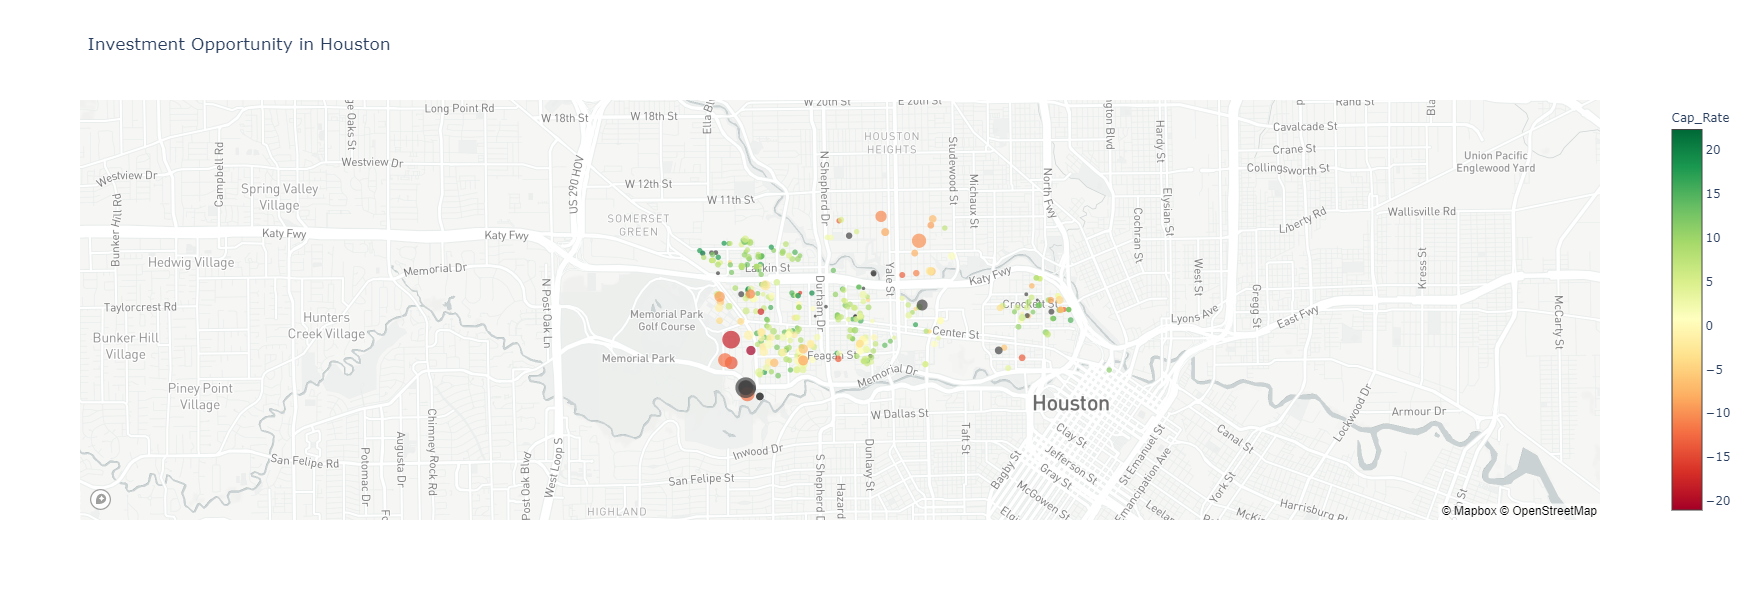

In [195]:
# Loading the mapbox token and relavent libraries to get ready to interact with the Mapbox API
import os
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
%matplotlib inline
mapbox_token = os.getenv("MAPBOX_API_KEY")

# Create a scatter mapbox to analyze neighborhood info
px.set_mapbox_access_token(mapbox_token)

px.scatter_mapbox(
   
    mls77007_caprates_active_forsale_df,
    lat= 'lat',
    lon= 'lng',
    size= 'List Price',
    color= 'Cap_Rate',
    color_continuous_scale= px.colors.diverging.RdYlGn,
    size_max=15, zoom=12,
    title= 'Investment Opportunity in Houston',
      
)


In [ ]:
url = f"https://api.mapbox.com/styles/v1/examples/cjikt35x83t1z2rnxpdmjs7y7?access_token={mapbox_token}"
response= requests.get(url)
google_response_text = response.text


In [ ]:
#Put dashboard together